# Практическое задание 1

### 1. Считывание данных

In [1]:
from BranchingProcess import Person, BranchingProcess, read_from_files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy
from collections import Counter
%matplotlib inline

In [2]:
files = ['S.txt', 'N.txt', 'W.txt', 'M.txt', 'C.txt', 'L.txt', 'R.txt', 'O.txt', 'D.txt', 'P.txt']

Сразу удалю поколения из одного человека, их слишком много, чтобы потом подробно их не просматривать

In [3]:
processes = [line for line in read_from_files(files) if len(line.generations) > 1]

Удалим все ненужное: людей с неопределенным полом, а также женщин, тк они не являются потомками как продолжаленями фамилии, это не повредит структуру данных и упростит дальнейший анализ

In [4]:
def badman(p):    #кого мы считаем плохим
    if (p.gender != 'male'):
        return True
    return False

In [5]:
print('Было '+str(len(processes))+' процессов')
k = 0
while(k<len(processes)):
    deleted_generations = 0
    i = 0
    while(i < len(processes[k].generations)):
        j = 0
        while(j < len(processes[k].generations[i])):
            if (badman(processes[k].generations[i][j])):
                del processes[k].generations[i][j]
            else:
                j+=1
        if(len(processes[k].generations[i]) < 1):
            del processes[k].generations[i]
            deleted_generations+=1
        else:
            i+=1 
    k+=1

Было 18234 процессов


Удалим процессы из одного человека

In [6]:
processes = [line for line in processes if len(line.generations) > 1]
print('Осталось '+str(len(processes))+' процессов')

Осталось 12842 процессов


### 2. Характеристики данных

Для начала считаем количество поколений в каждом из ветвящемся процессов

In [7]:
gen_len = [len(i.generations) for i in processes] #количества поколений в каждом из родов

In [8]:
print('Минимальное количество поколений:')
print(min(gen_len))
print('Максимальное количество поколений:')
print(max(gen_len))
print('Среднее количество поколений:')
print(np.mean(gen_len))

Минимальное количество поколений:
2
Максимальное количество поколений:
80
Среднее количество поколений:
3.66703005762


Исходя из этого, можно сделать вывод, что большинство процессов вырождаются очень быстро (за 2-3 поколения)

#### Исследование годов жизни

In [9]:
minbirth = []  #годы рождения самого старшего в родах
maxbirth = []  #годы рождения самого млодшего в родах
averlength = [] #средние продолжительности жизни в родах
for p in np.arange(len(processes)):
    minproc = 2100 #мин год рождения в процессе
    maxproc = -1   #максимальный год рождения в процессе
    lifelen = []   #продолжительности жизни
    for i in processes[p].generations:
        for j in i:
            if(len(j.birthday)>1):
                    birth = int(j.birthday[:4])
                    if(birth < minproc):
                        minproc = birth
                    if(birth > maxproc):
                        maxproc = birth 
                    if(len(j.deathdate)>1):
                        lifelen.append(int(j.deathdate[:4])-birth)
    if(minproc == 2100):
        minbirth.append(None)
        maxbirth.append(None)
        averlength.append(None)
    else:
        minbirth.append(minproc)
        maxbirth.append(maxproc)
        if(len(lifelen)>0):
            averlength.append(int(np.mean(lifelen)))
        else:
            averlength.append(None)

Средняя продолжительность жизни во всей выборке:

In [10]:
averofall = int(np.mean([i for i in averlength if i != None]))
print(averofall)

61


Изобразим полученные результаты на графиках

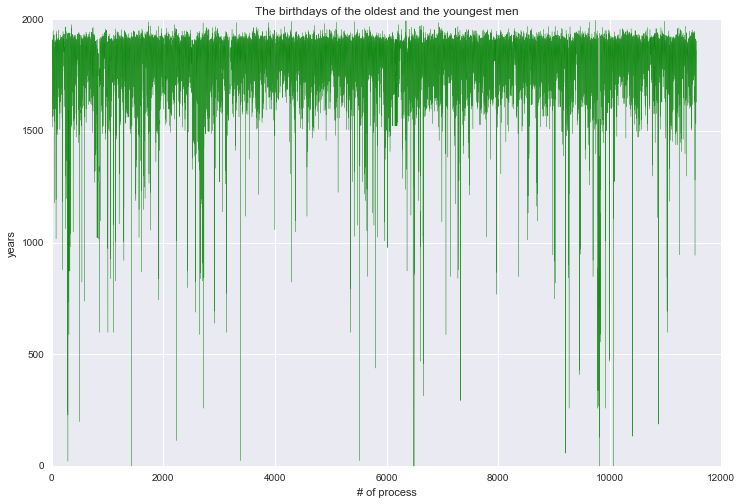

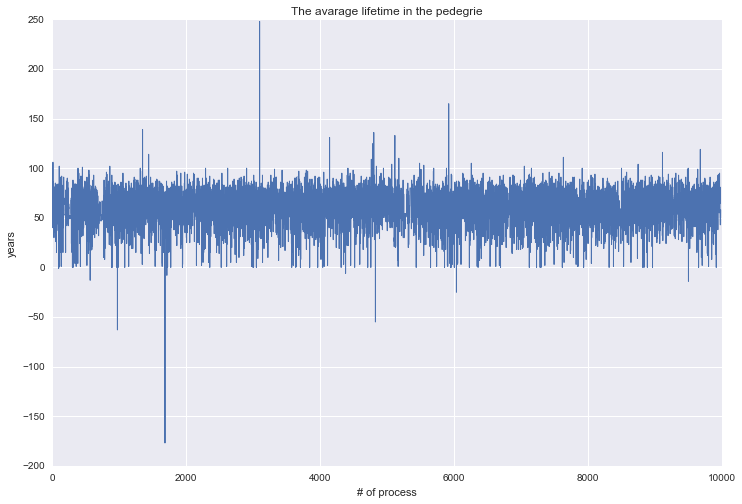

In [11]:
notnull = [i for i in range(len(processes)) if minbirth[i]!=None]
grid = np.arange(len(notnull))
plt.figure(figsize=(12,8))
plt.fill_between(grid, [minbirth[i] for i in notnull], [maxbirth[i] for i in notnull], color ='green', alpha=0.8 )
plt.title('The birthdays of the oldest and the youngest men')
plt.ylabel('years')
plt.xlabel('# of process')
plt.show()
notnull = [i for i in notnull if averlength[i] != None]
grid = np.arange(len(notnull))
plt.figure(figsize=(12,8))
plt.plot(grid, [averlength[i] for i in notnull], linewidth=1)
plt.title('The avarage lifetime in the pedegrie')
plt.ylabel('years')
plt.xlabel('# of process')
plt.show()

На первом гравике видно, что, хотя данные содержат длинные родословные, но в основном исследуется только период начиная с 15 века.

На втором графике видно, что данные очень странные и содержат много ошибок: очень много родословных с отрицательной средней продолжительностью жизни.


##### Построение гистограммы зависимости количества родов от количества поколений в них

In [12]:
df = pd.DataFrame(gen_len)

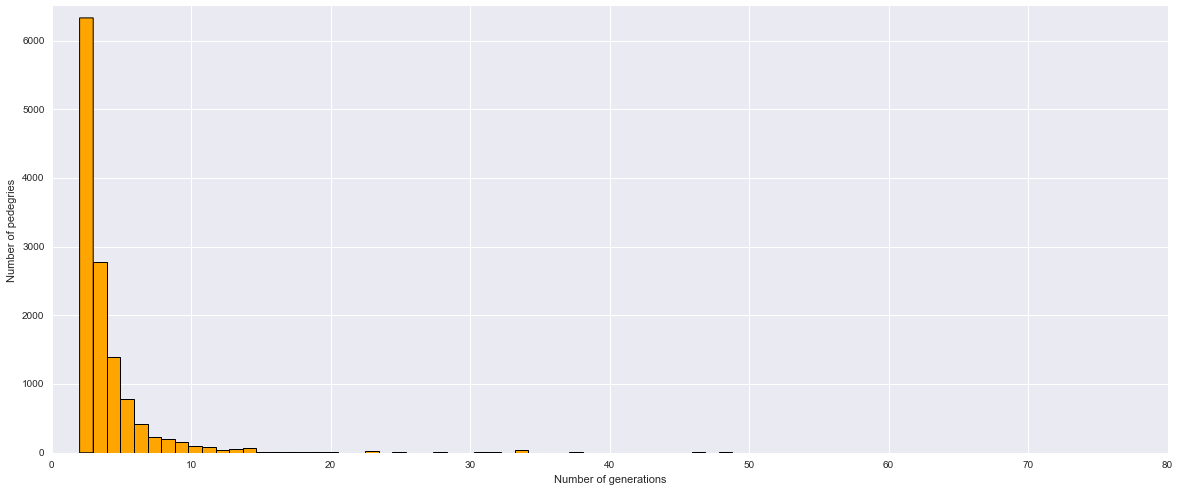

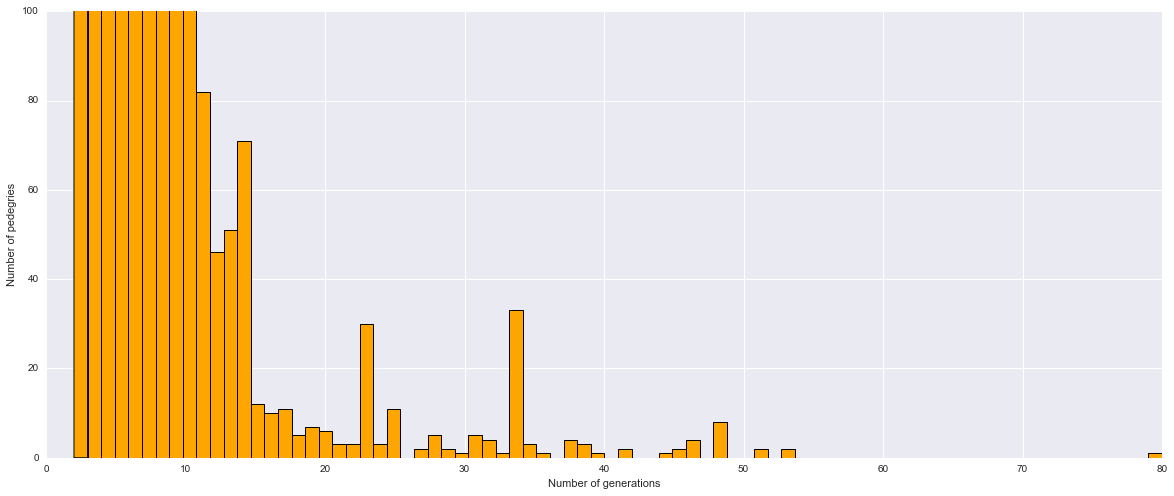

In [13]:
df.plot(kind='hist',color='orange', linewidth=1, bins=80, figsize=(20,8), ylim=(0, 6500),
        legend=False)
plt.xlabel('Number of generations')
plt.ylabel('Number of pedegries')
df.plot(kind='hist',color='orange', linewidth=1, bins=80, figsize=(20,8), ylim=(0, 100),
        legend=False)
plt.xlabel('Number of generations')
plt.ylabel('Number of pedegries')
plt.show()

Из полученной гистограммы видно, что более половины родостловных содержат не более 2 поколений, и в целом количество родов убывает очень быстро

##### Года рождения всех людей

In [14]:
years = []
for pr in processes:
    for i in pr.generations:
        for j in i:
            if(len(j.birthday)>1):
                    years.append(int(j.birthday[:4]))

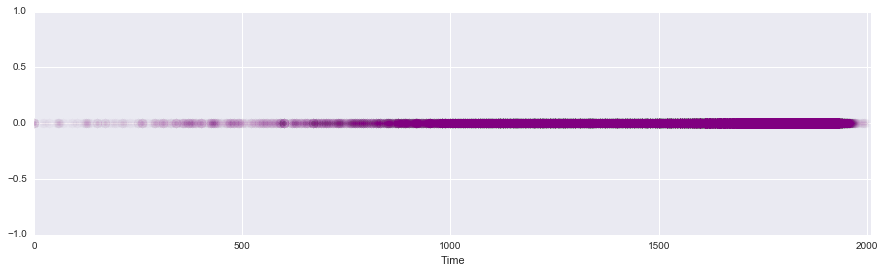

In [15]:
plt.figure(figsize=(15, 4))
plt.scatter(years, np.zeros(len(years)), color='purple', alpha=0.01, linewidth=5)
plt.ylim((-1, 1))
plt.xlim((0, 2010))
plt.xlabel('Time')
plt.show()

Итак, главным образом исследуется период с 9 по 19 века

### 3. Законы размножения

Оценка максимального правдоподобия для Пуассоновского распределения - $\bar{X}$
Дискратное считаю как набор вероятностей для конечного числа исходов

In [16]:
def param(numofch):   #параметр Пуассоновского распределения
    return np.mean([numofch[i] for i in numofch])

In [17]:
allnumofch = {i:0 for i in np.arange(20)} #словарь - количество детей:кол-во людей с таким количеством детей
parameters = []

Считаем количество детей у каждого в роду. Лучше всего это будет сделать, просматривая отцов у каждого человека, тк данные не полны и устроены странно, но отец есть у каждого. Тех, кто родился не раньше 1950, буду считать отдельно, чтобы, если у них не будет детей, не учитывать их

In [18]:
for pr in processes:
    numofch = {} #количество детей у каждого человека в роду (фамилия:кол-во)
    fifties = {} #numofch для тех, кто родился после 1950
    for i in range(0, len(pr.generations)):
        for j in pr.generations[i]:
            if(i != 0):
                name = j.parents[0].replace(' ', '_')
                if(numofch.get(name, -1) == -1):     #ищем до 50го
                    if(fifties.get(name, -1) == -1):
                        name = j.parents[1].replace(' ', '_') #иногда отец указан вторым
                        if(numofch.get(name, -1) == -1):
                            fifties[name] +=1
                        else:
                            numofch[name] +=1
                    else:
                        fifties[name] +=1
                else:
                    numofch[name] +=1
                    
            if(i != len(pr.generations)-1):  #не учитываю, что у последнего поколения нет детей - данные могут быть не полны
                if(len(j.birthday)>0):
                    if(int(j.birthday[:4])<1950): #если родился раньше 50го
                        numofch[j.name.replace(' ', '_')] = 0
                    else:
                        fifties[j.name.replace(' ', '_')] = 0
                else:
                    fifties[j.name.replace(' ', '_')] = 0
    for i in fifties:
        if(fifties[i] > 0):
            numofch[i] = fifties[i]
    parameters.append(param(numofch))
    for n in numofch:
        allnumofch[numofch[n]]+=1  

In [19]:
allmen = sum([allnumofch[i] for i in allnumofch])
par = sum([i*allnumofch[i] for i in allnumofch])/allmen
print(par)

1.17958250413


Дискретное распределение

In [20]:
probab = [allnumofch[i]/allmen for i in allnumofch]

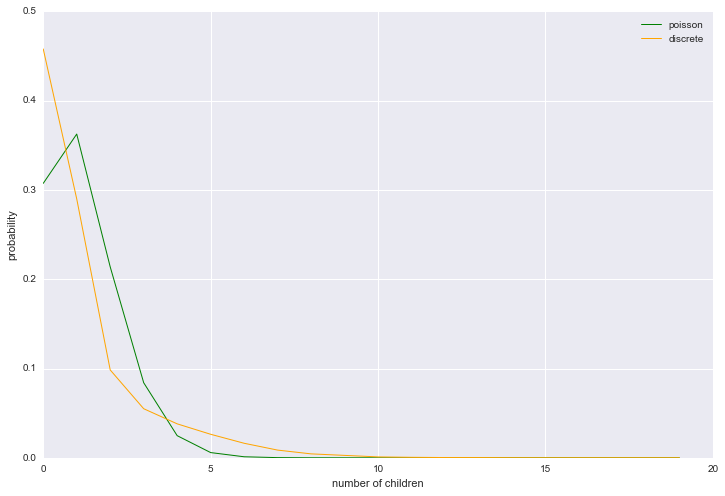

In [21]:
grid = [i for i in allnumofch]
plt.figure(figsize=(12,8))
plt.plot(grid, sps.poisson.pmf(grid, par), linewidth=1, color='green', label='poisson')
plt.plot(grid, probab, linewidth=1, color='orange', label='discrete')
plt.xlabel('number of children')
plt.ylabel('probability')
plt.legend()
plt.show()

На графике видно, что распределение Пуассона и дисретное сильно отличаются в нуле, а так же Пуассон быстрее убывает. Возможно, это не самая подходящая модель для данного процесса

### 4. Моделирование процесса назад

Буду постепенно подбирать количество предков, исходя из известного закона размножения, чтобы точно получилось нужное число потомков. изначально разделю все роды по году рождения первого человека, условно не поколения, если неизвестно, то по дате смерти, иначе буду генерировать случайное число из дискретного распределения, полученного путем отбрасывания людей с неизвестными датами и вычислением частоты стречаемости того или иного поколения, чтобы не загромождать работу, приведу только выисленные веротности. Средняя продолжительность жизни взята равной 60.

In [22]:
elements = np.arange(int(200/6)+1)
probabilites = np.array([7/10392, 1/10392, 2/10392, 1/10392, 8/10392, 2/10392, 1/10392, 3/10392, 0,10/10392, 8/10392,
                        12/10392, 7/10392, 16/10392, 64/10392, 5/10392, 20/10392, 31/10392, 23/10392,19/10392,
                        16/10392, 30/10392, 21/10392, 34/10392, 77/10392, 229/10392, 389/10392, 625/10392,1025/10392,
                        1804/10392, 3404/10392, 2264/10392, 218/10392, 16/10392])
#вероятности вычислены способом ниже без учета неизвестных дат

In [23]:
ancestor = np.zeros(int(200/6) + 1, dtype=np.int) 
for p in processes:
    for j in p.generations[0]:
        if(len(j.birthday)>1):
            ancestor[int(int(j.birthday[:4])/60)] += 1
        else:
            if(len(j.deathdate)>1):
                ancestor[int(int(j.deathdate[:4])/60)] += 1
            else:
                ancestor[np.random.choice(elements, p=probabilites)] += 0

In [24]:
i = int(200/6)
numroots = [ancestor[-1]]
k=50
while(numroots[-1] != 1)and(k!=0):
    k -= 1
    newline = desc = 0
    while (desc < numroots[-1]):
        newline += 1
        desc += sps.poisson.rvs(1.5)
    i -= 1
    if(i >= 0):
        newline += ancestor[i]
    numroots.append(newline)

Итак рассмотрим количество "родоначальников" и их предков (начиная от более позднего поколения к более раннему):

In [25]:
print(numroots)
print(len(numroots))

[16, 236, 2424, 4978, 5140, 4470, 3637, 2863, 2143, 1471, 1027, 727, 507, 342, 247, 182, 162, 127, 98, 127, 106, 92, 77, 68, 49, 30, 21, 14, 16, 21, 12, 16, 15, 19, 17, 11, 9, 5, 3, 2, 2, 3, 5, 2, 1]
45


Итак, мы приходим к общему предку через 39 поколений

### 5. Моделирование процесса вперед
Буду генерировать количества потомков по полученным законам распределения.

In [28]:
elements = np.arange(20)
#для пуассоновского распределения
numoffam = [len(processes)]   #кол-во семей (инд законы)
numoffamall = [len(processes)] #кол-во семей(общий заком)
lastgen = [len(pr.generations[-1]) for pr in processes] #список ко-в человек в каждом роде в последнем поколении
lastgenall = [len(pr.generations[-1]) for pr in processes] # -*- для общего закона
numofmen = [sum(lastgen)] #кол-ва человек в поколении всего по индивид законам
numofmenall = [sum(lastgen)] #кол-ва человек в поколении всего по общему закону


for t in np.arange(3):
    for i in np.arange(len(processes)):
        newgen = 0
        newgenall = 0
        for j in np.arange(lastgen[i]):
            newgen += sps.poisson.rvs(par)
        for j in np.arange(lastgenall[i]):
            newgenall += sps.poisson.rvs(parameters[i])
        lastgen[i] = newgen
        lastgenall[i] = newgenall
    
    proc = sum([1 for i in lastgen if i != 0])
    procall = sum([1 for i in lastgenall if i != 0])
    
    numoffam.append(proc)
    numoffamall.append(procall)
    numofmen.append(sum(lastgen))
    numofmenall.append(sum(lastgenall))

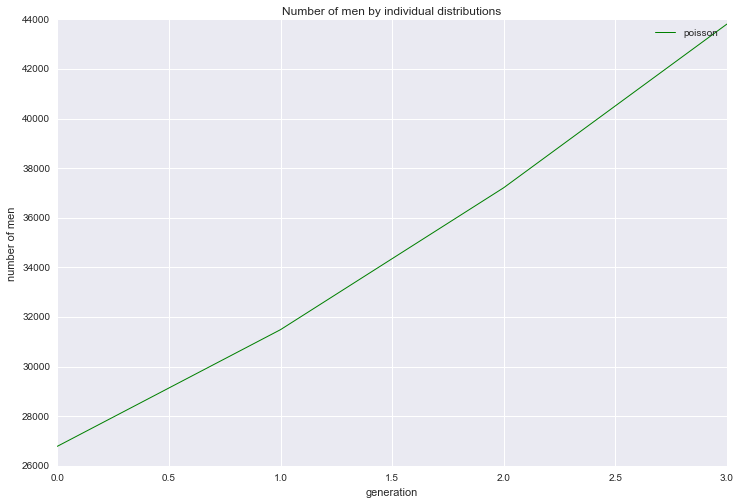

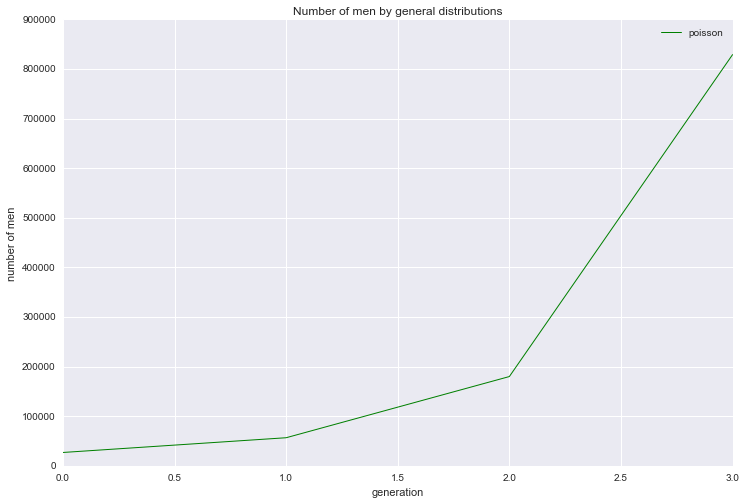

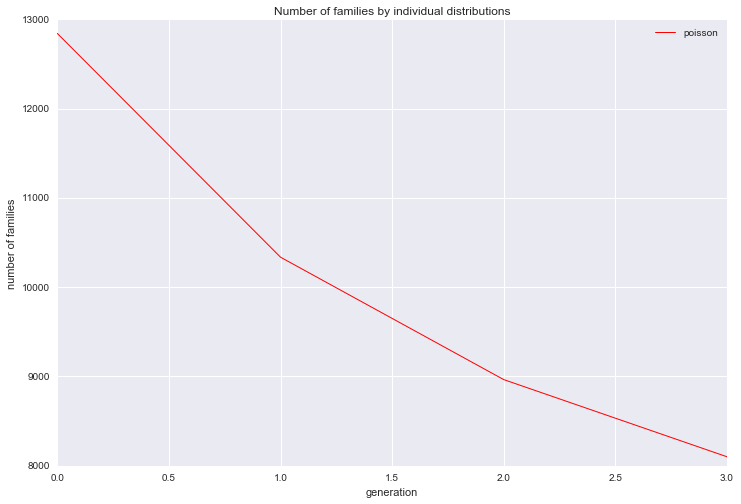

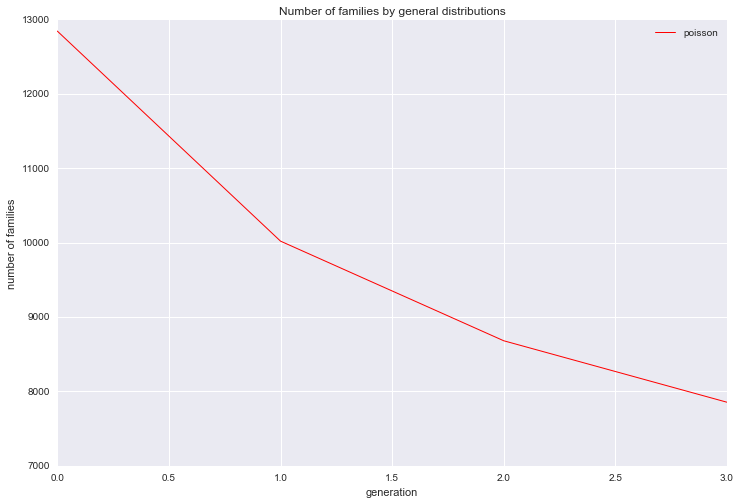

In [32]:
grid = np.arange(4)
plt.figure(figsize=(12,8))
plt.title('Number of men by individual distributions')
plt.xlabel('generation')
plt.ylabel('number of men')
plt.plot(grid, numofmen, linewidth=1, color='green', label='poisson')
plt.legend()
plt.show()
plt.figure(figsize=(12,8))
plt.title('Number of men by general distributions')
plt.xlabel('generation')
plt.ylabel('number of men')
plt.plot(grid, numofmenall, linewidth=1, color='green', label='poisson')
plt.legend()
plt.show()
plt.figure(figsize=(12,8))
plt.title('Number of families by individual distributions')
plt.xlabel('generation')
plt.ylabel('number of families')
plt.plot(grid, numoffam, linewidth=1, color='red', label='poisson')
plt.legend()
plt.show()
plt.figure(figsize=(12,8))
plt.title('Number of families by general distributions')
plt.xlabel('generation')
plt.ylabel('number of families')
plt.plot(grid, numoffamall, linewidth=1, color='red', label='poisson')
plt.legend()
plt.show()

### 6. Вероятность вырождения

Буду искать вероятность вырождения по теореме о вероятности вырождения. Для пуассоновского распределения производящая функция - $e^{-\lambda(z-1}$. Матожидание - $\lambda$

In [33]:
def equality(lam, z):
    return np.exp(-lam*(z-1))-z

In [35]:
def prob(par):
    if(lam<=1):
        return 1
    else:
        return scipy.brenth(equality(lam=par), 0, 1)

IndexError: index 34 is out of bounds for axis 1 with size 34

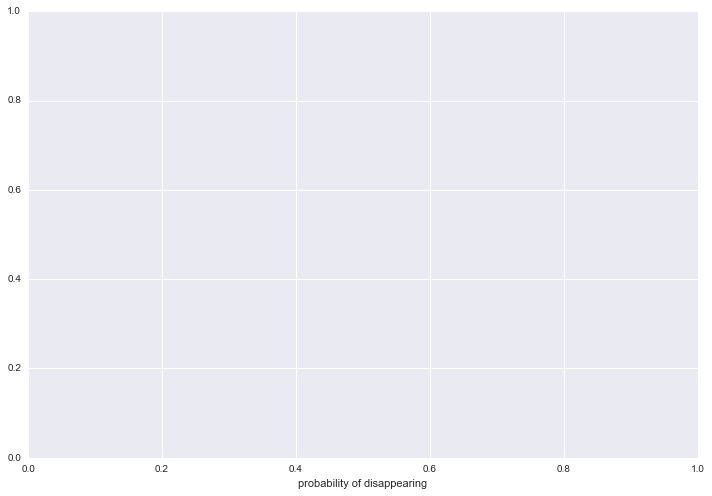

In [38]:
t = 0
plt.figure(figsize=(12, 8))
grid = np.arange(len(processes))
plt.xlabel('probability of disappearing')
plt.scatter(probabilites[grid], np.zeros(len(years)), color='purple', alpha=0.01, linewidth=5)
plt.legend()
plt.show()